Code d'analyse de tracking. Il permet de récupérer les fichiers issus du tracking et d'en tirer les trajectoires pertinentes et d'en faire l'étude statistique. 

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  1 12:46:56 2023.

@author: souchaud
"""
# %%
import os
import time
import math
import pandas as pd
import matplotlib.pyplot as plt
import trackpy as tp
import functions_analyze as lib
import warnings
import numpy as np
from collections import defaultdict
from colorama import init, Fore, Style
init(autoreset=True)
# from matplotlib.cm import ScalarMappable
# import pdb; pdb.set_trace()
# warnings.simplefilter("always")  # This will always display warnings
# warnings.simplefilter('error', RuntimeWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

Initialisation des variables et constantes de travail.

In [8]:
# set initial time
INITIAL_TIME = time.time()

# experiment parameters
TIME_FRAME = 15  # 75
SIZE_PIX = 1.2773  # 1.634  # 4.902
FPS = 1/TIME_FRAME

# number of frame kept
N_FRAME = 1

# nber hours of stydy:
LONG_TIME = False

# Study parameters
ROLLING_MEAN = False
PIXELISATION = False
TIME_FRAME_STUDY = False
DRIFT = True

# plot parameters
IMG_TYPE = 'jpg'
ALPHA = 0.5
LINEWIDTH = 0.1
COLOR_SUP = 'blue'
COLOR_INF = 'red'
color_sup_inf = (COLOR_SUP, COLOR_INF)

# % de présences de la particules sur le total de frame étudiées

FRAME_PARTICULE = 1

# ##########
# % de présences des courbes dans les frames

FRAME_PARTICULE = 0.8

Définition des path et dossiers de travails / enregistrements.

In [9]:
# ##########################   GENERAL PATH   #################################
GENERAL_PATH = '/Users/souchaud/Desktop/Analyses/'
# # Pathway to the experiments
PATHWAY_EXPERIMENT = []

# ##########################  EXPERIMENT PATH  ################################

# # # # ######### CONDITION: ################
# CONDITION = 'CytoOne_SorC_longtime'
# CONDITION = 'NonT_SorC_longtime'
CONDITION = 'CytoOne_HL5_longtime'
# CONDITION = 'ASMOT035_fiji'
# # # #####################################


if len(PATHWAY_EXPERIMENT) == 0:
    PATHWAY_EXPERIMENT = [f for f in os.listdir(GENERAL_PATH + CONDITION) if
                          os.path.isdir(os.path.join(GENERAL_PATH + CONDITION, f))]
# ##########################   Path Exp final  ###############################

PATHWAY_EXPERIMENT = [f'{GENERAL_PATH}{CONDITION}/' +
                      elem + '/mosaic/' for elem in PATHWAY_EXPERIMENT]

# ##########################   Path to Save pic  ##############################

path_save_pic = f'{GENERAL_PATH}résultats_{CONDITION}_ALL_OK_x5_15s/'

# création d'un dossier spécific d'enregistrement.
if not os.path.exists(path_save_pic):
    os.mkdir(path_save_pic)
os.chdir(path_save_pic)

Lecture des données expériementales

['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_06_29_ASMOT076_BoiteCytoOne_HL5_Chi2Em_P7_5x_15s_21c_t0/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

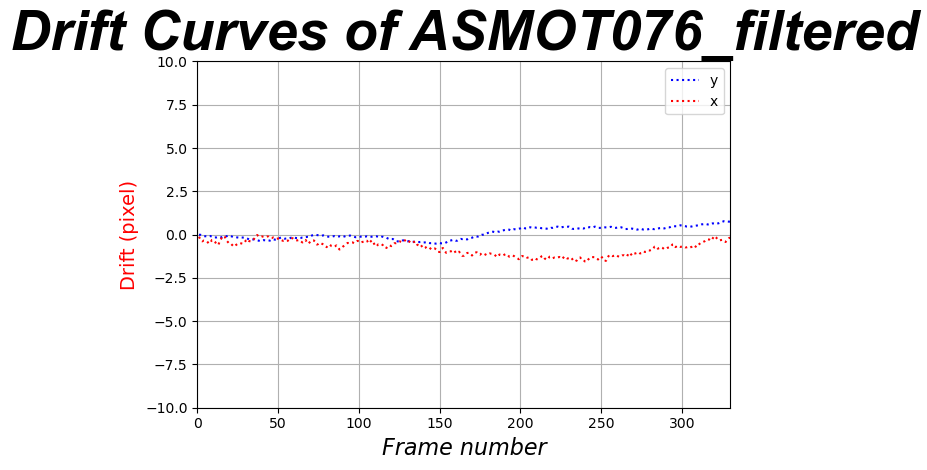

ASMOT076  :  1222
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_02_16_ASMOT058_BoiteCytoOne_HL5_Ch1_p1_5x_15s_21c_t90_Em/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

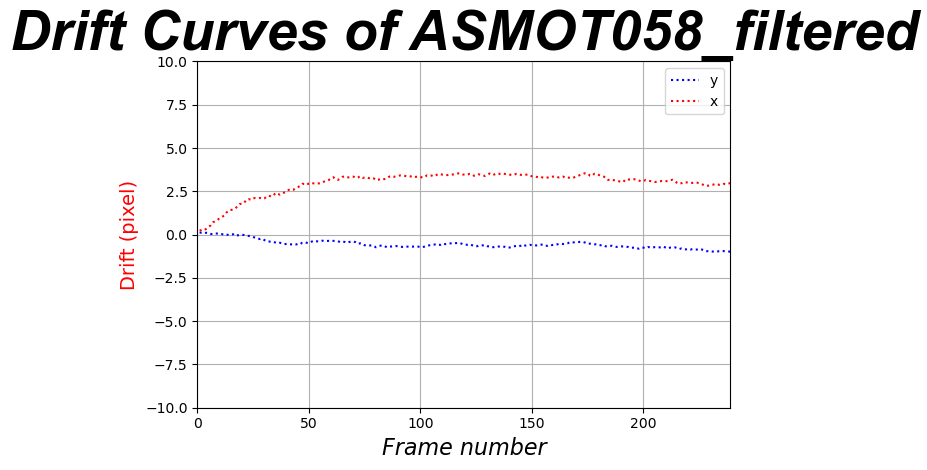

ASMOT058  :  2117
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_01_25_ASMOT054_BoiteCytoOne_HL5_15s_5x_P3_AX3Chi2_t0_21c_DGMOT01/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

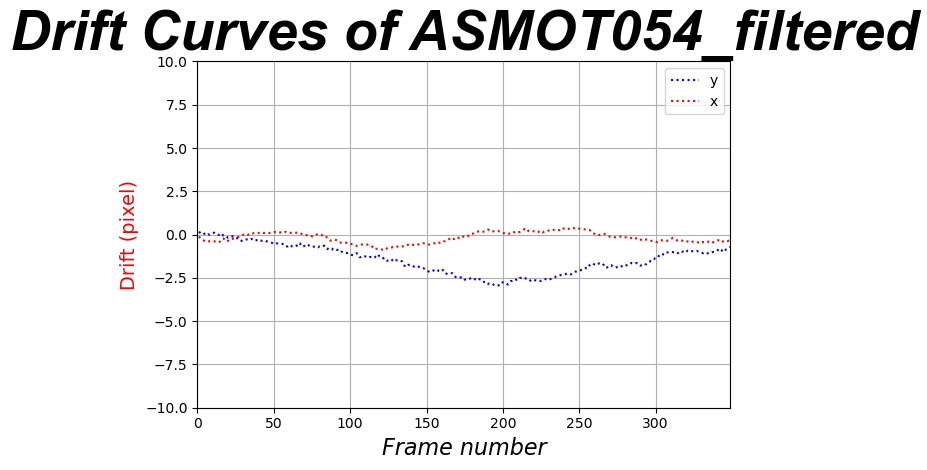

ASMOT054  :  1011
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_01_27_ASMOT055_BoiteCytoOne_HL5_15s_5x_P4_AX3Chi2_t0_21c/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

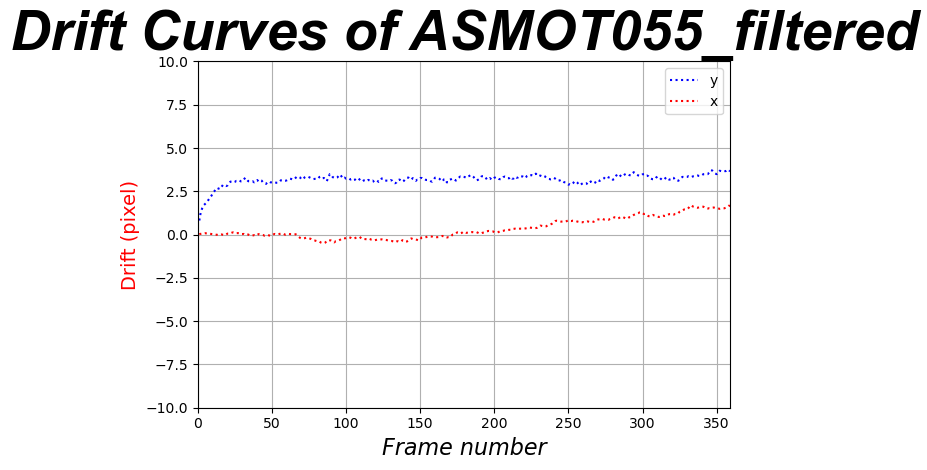

ASMOT055  :  474
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_09_07_ASMOT092_AX3_P2_CytoOnne_HL5_5x_15s_t5h/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

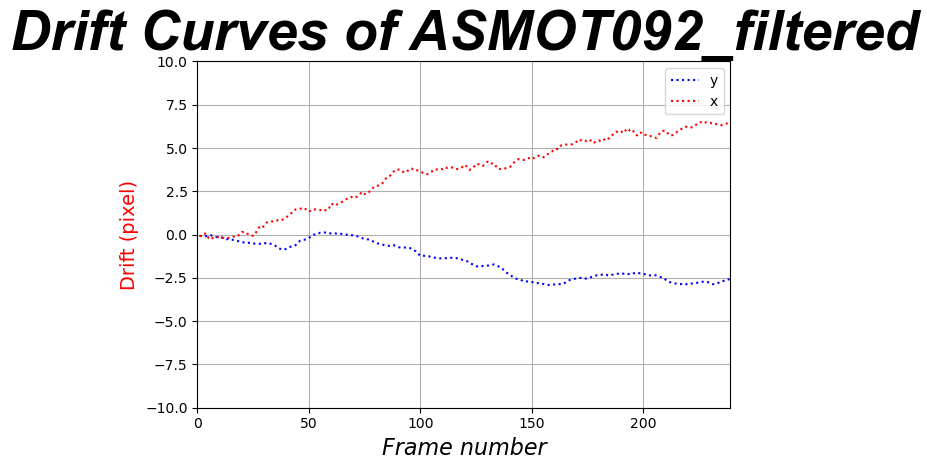

ASMOT092  :  483
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_07_05_ASMOT081_BoiteCytoOne_HL5_Chi2Em_P2_5x_15s_21c_t0h-pournuit/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

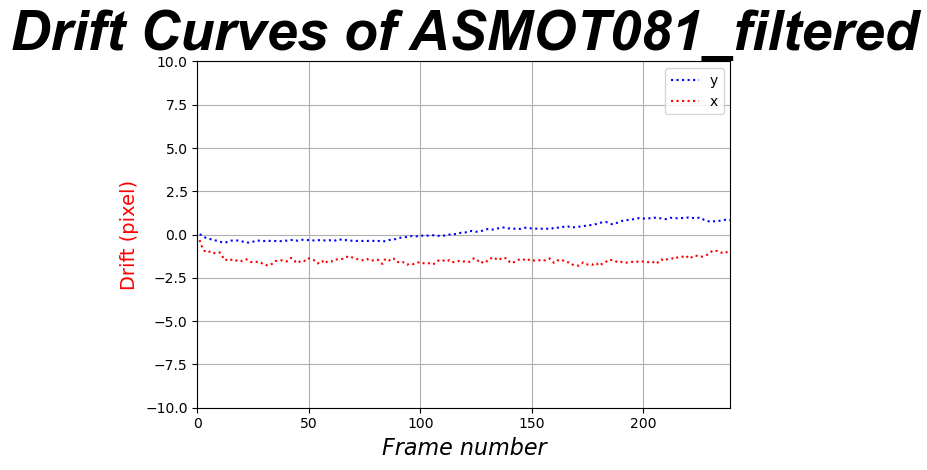

ASMOT081  :  404
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_06_29_ASMOT078_BoiteCytoOne_HL5_Chi2Em_P7_5x_15s_21c_t0_OVERNIGHT/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

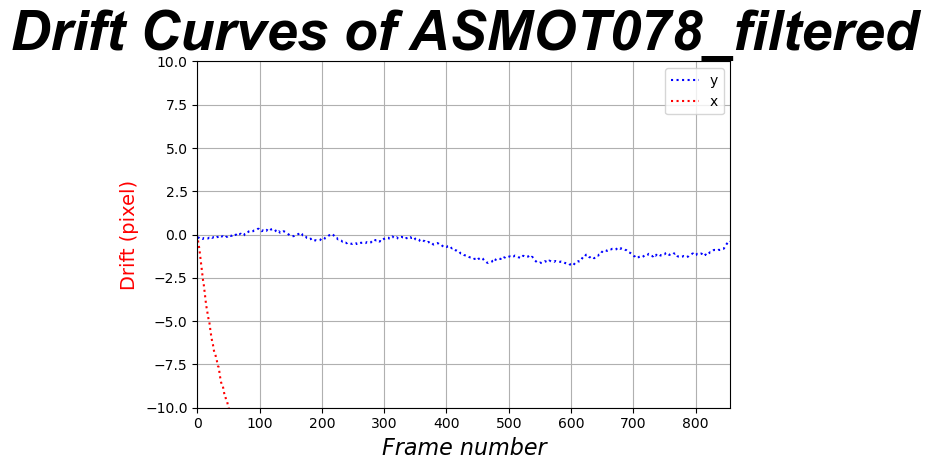

ASMOT078  :  1824
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_07_05_ASMOT080_BoiteCytoOne_HL5_Chi2Em_P2_5x_15s_21c_t0h-pour5h/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

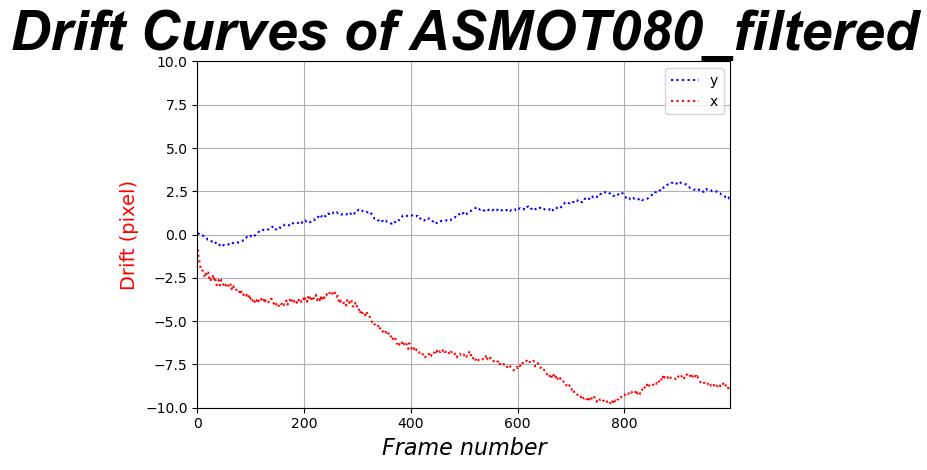

ASMOT080  :  1805
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_09_08_ASMOT093_AX3_P2_CytoOnne_HL5_5x_15s_t0h/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

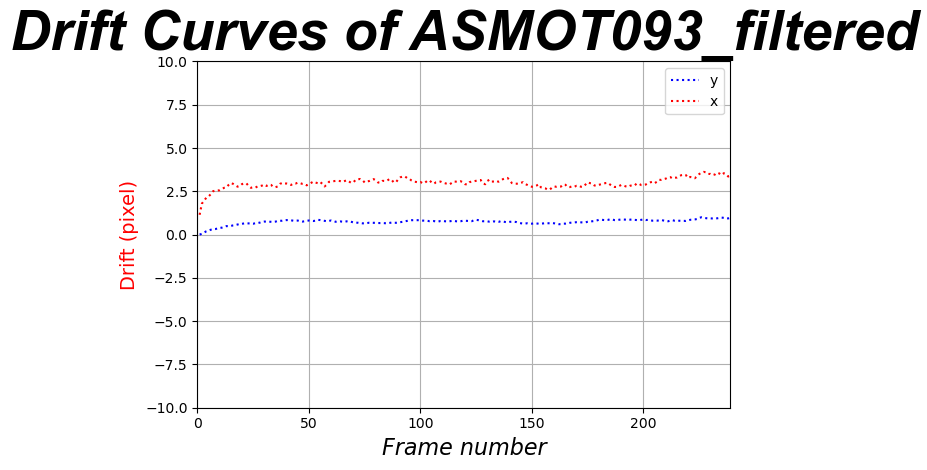

ASMOT093  :  1060
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_06_29_ASMOT077_BoiteCytoOne_HL5_Chi2Em_P7_5x_15s_21c_t2h-pour5h/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

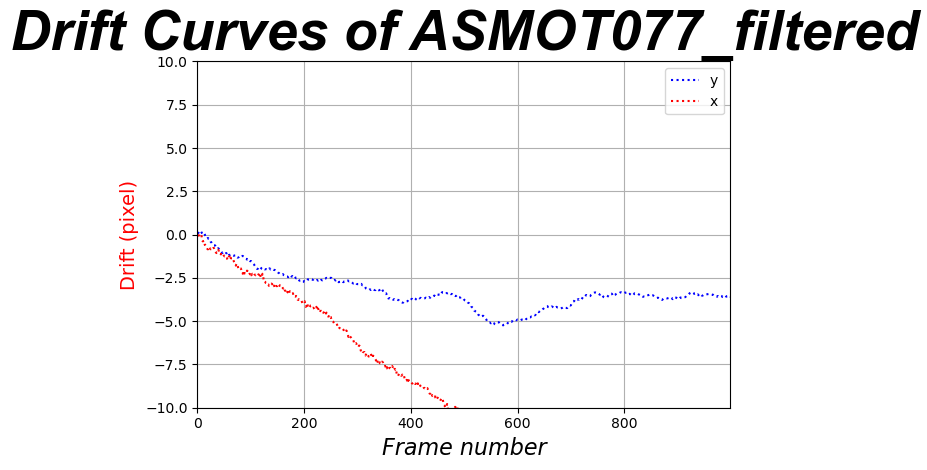

ASMOT077  :  2713
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2022_12_19_ASMOT050_BoiteCytoOne_HL5_15s_5x_P9_AX3Chi2_t0_21c/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

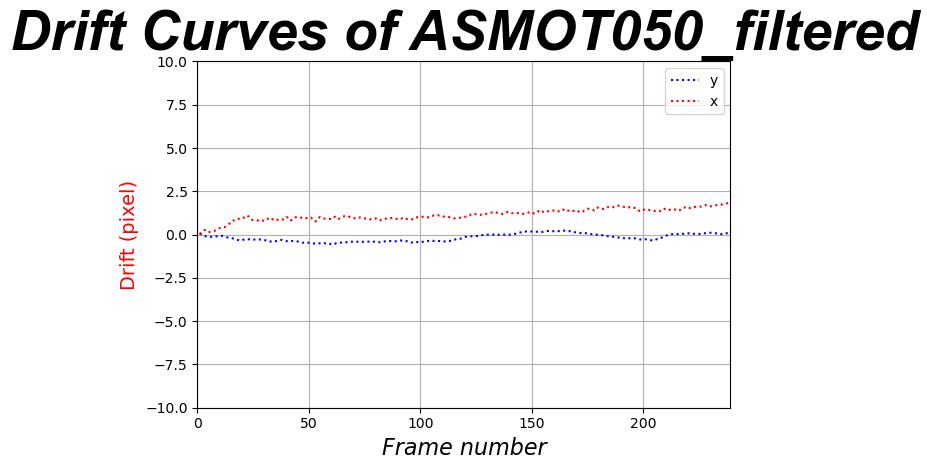

ASMOT050  :  1027
['/Users/souchaud/Desktop/Analyses/CytoOne_HL5_longtime/2023_02_15_ASMOT057_BoiteCytoOne_HL5_Chi2_P4_5x_15s_21c_t90_Em/mosaic/filtered.hdf5']


<Figure size 2000x2000 with 0 Axes>

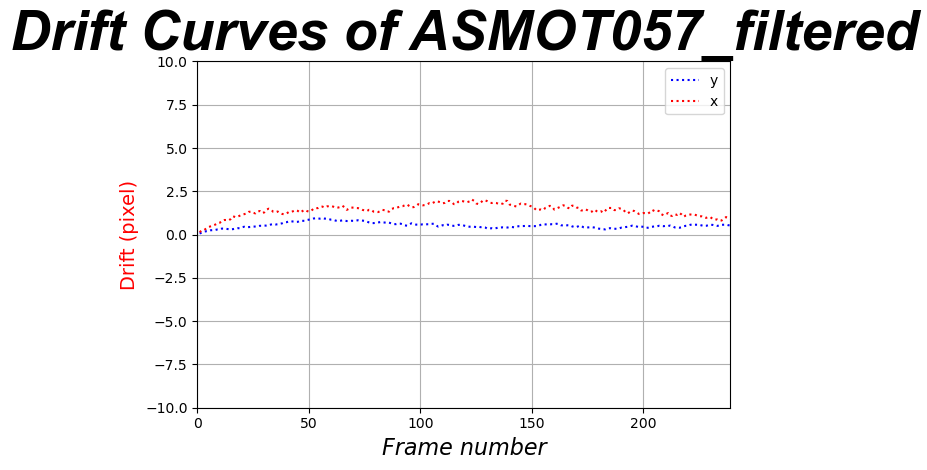

ASMOT057  :  592
Nombre de particules récoltées avant tri:  14732
before all procedure, we have: 
experiment
ASMOT050    1027
ASMOT054    1011
ASMOT055     474
ASMOT057     592
ASMOT058    2117
ASMOT076    1222
ASMOT077    2713
ASMOT078    1824
ASMOT080    1805
ASMOT081     404
ASMOT092     483
ASMOT093    1060
Name: particle, dtype: int64


In [10]:
DATA = lib.read_hdf5_all(pathway_experiment=PATHWAY_EXPERIMENT,
                         condition=CONDITION, drift=DRIFT)
# DATA = DATA[DATA['frame'] < 240]
# In[Calcul des courbes à 80% des frames]
print("before all procedure, we have: ")
print(DATA.groupby('experiment')['particle'].nunique())